<a href="https://colab.research.google.com/github/mjmousavi97/Deep-Learning-Tehran-uni/blob/main/HomeWorks/01%20HW/tensorflow_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TensorFlow
Mohammad Javad

TensorFlow is a large and powerful library that provides a wide range of functions and features for building and training machine learning models. However, there are a few functions that are particularly important and commonly used. Here are some of the most important functions in TensorFlow:

* tf.constant(): This function creates a constant tensor with a specified value. It is often used to define input data or model parameters that are not changed during training.

* tf.Variable(): This function creates a mutable tensor variable that can be modified during training. Variables are often used to store model parameters that are updated during optimization.


* tf.matmul(): This function performs matrix multiplication between two tensors. It is a fundamental building block for many machine learning models, including neural networks.

* tf.nn.relu(): This function implements the rectified linear activation function, which is commonly used in neural networks. It helps to introduce non-linearity into the model and can improve its ability to learn complex patterns.

* tf.train.Optimizer(): This class provides a variety of optimization algorithms that can be used to train machine learning models. Some common optimizers include Stochastic Gradient Descent (SGD), Adam, and Adagrad.

* tf.reduce_mean(): This function computes the mean of a tensor along a specified axis. It is often used to compute the loss function during training.

These are just a few of the most important functions in TensorFlow, but there are many others that are also useful for building and training machine learning models.

In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [9]:
!nvidia-smi

Thu Jul 31 05:38:04 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   38C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [10]:
x = tf.constant(42)
tf.print(x)
print(x)

42
tf.Tensor(42, shape=(), dtype=int32)


In [ ]:
y = tf.constant([1, 2, 3])
tf.print(y)
print(y)

[1 2 3]
tf.Tensor([1 2 3], shape=(3,), dtype=int32)


In [ ]:
z = tf.constant(
    [
        [1, 2],
        [3, 4]
    ]
)
tf.print(z)
print(z)

[[1 2]
 [3 4]]
tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)


In [ ]:
a = tf.constant(([[1, 2], [3, 4]]))
b = tf.constant([[5, 6], [7, 8]])

c = tf.add(a, b)
tf.print(c)

[[6 8]
 [10 12]]


In [ ]:
d = tf.multiply(a, b)
tf.print(d)

[[5 12]
 [21 32]]


In [ ]:
e = tf.matmul(a, b)
tf.print(e)

[[19 22]
 [43 50]]


In [ ]:
f = tf.subtract(a, b)
tf.print(f)

[[-4 -4]
 [-4 -4]]


In [ ]:
g = tf.divide(a, b)
tf.print(g)

[[0.2 0.33333333333333331]
 [0.42857142857142855 0.5]]


# Variables

In TensorFlow, a Variable is a tensor whose value can be changed during the computation. Variables are typically used to represent the parameters of a machine learning model. You can create a variable using the tf.Variable function, like this:

In [ ]:
w = tf.Variable(tf.random.normal([2, 3]), name='weights')
b = tf.Variable(tf.random.normal([2]), name='biases')
tf.print(w)
print('\n')
tf.print(b)

[[1.31258023 -1.31197274 0.00414866162]
 [0.633579373 0.418994755 0.565889239]]


[1.11200118 0.540875435]


tf.nn.relu

tf.nn.relu(
    features, name=None
)

ReLU(x)=max(0,x)

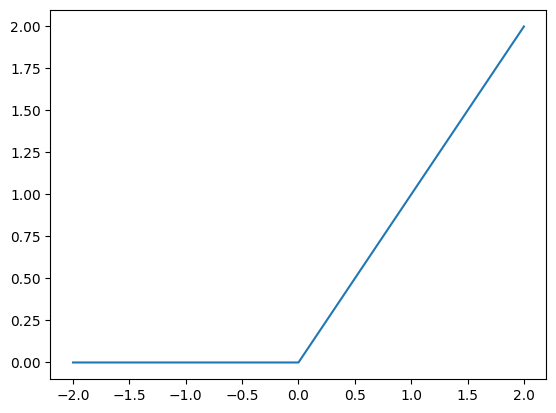

In [ ]:
x = tf.linspace(-2, 2, 201)
x = tf.cast(x, tf.float32)
plt.plot(x, tf.nn.relu(x))

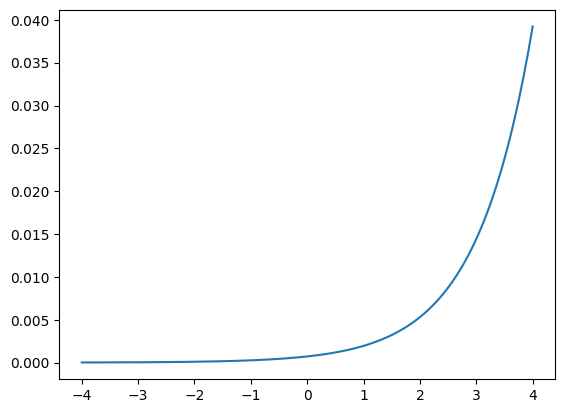

In [ ]:
x = tf.linspace(-4, 4, 201)
x = tf.cast(x, tf.float32)
plt.plot(x, tf.nn.softmax(x))

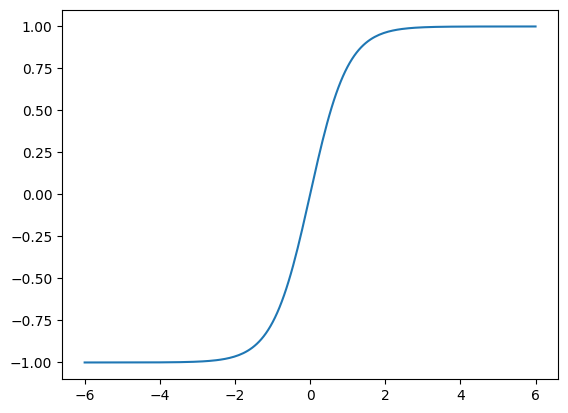

In [ ]:
x = tf.linspace(-6, 6, 200)
x = tf.cast(x, tf.float32)
plt.plot(x, tf.nn.tanh(x))

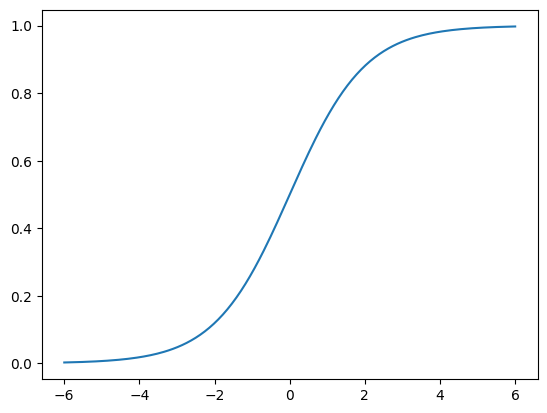

In [ ]:
x = tf.linspace(-6, 6, 200)
x = tf.cast(x, tf.float32)
plt.plot(x, tf.nn.sigmoid(x))

## mlp with TensorFlow
Mohammad Javad

In [5]:
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [6]:
def load_data():
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    X_train = np.reshape(X_train, (X_train.shape[0], -1))
    X_test = np.reshape(X_test, (X_test.shape[0], -1))

    X_train = X_train / 255
    X_test = X_test / 255

    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)

    return X_train, X_test, y_train, y_test

In [11]:
X_train, X_test, y_train, y_test = load_data()

In [12]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


In [13]:
class MLP:
    def __init__(self, layers):
        self.layers = layers
        self.L = len(layers)
        self.num_features = layers[0]
        self.num_classes = layers[-1]
        self.w = {}
        self.b = {}
        self.dw = {}
        self.db = {}

    def initialize(self):
        for i in range(1, self.L):
            self.w[i] = tf.Variable(tf.random.normal(shape=(self.layers[i], self.layers[i-1])))
            self.b[i] = tf.Variable(tf.random.normal(shape=(self.layers[i], 1)))

    def forward_pass(self, X):
        A = tf.convert_to_tensor(X, dtype=tf.float32)
        for i in range(1, self.L):
            Z = tf.matmul(A, tf.transpose(self.w[i])) + tf.transpose(self.b[i])
            if i != (self.L - 1):
                A = tf.nn.relu(Z)
            else:
                A = Z
        return A

    def compute_loss(self, A, Y):
        loss = tf.nn.softmax_cross_entropy_with_logits(labels=Y, logits=A)
        return tf.reduce_mean(loss)

    def update_params(self, lr):
        for i in range(1, self.L):
            self.w[i].assign_sub(lr * self.dw[i])
            self.b[i].assign_sub(lr * self.db[i])

    def predict(self, x):
        A = self.forward_pass(x)
        return tf.argmax(tf.nn.softmax(A), axis=1)

    def info(self):
        num_params = 0
        for i in range(1, self.L):
            num_params += self.w[i].shape[0] * self.w[i].shape[1]
            num_params += self.b[i].shape[0]
        print('Input Features:', self.num_features)
        print('Number of Classes:', self.num_classes)
        print('Hidden Layers:')
        print('--------------')
        for i in range(1, self.L - 1):
            print(f'Layer {i}, Units {self.layers[i]}')
        print('--------------')
        print('Number of parameters:', num_params)

    def train_on_batch(self, X, Y, lr):
        X = tf.convert_to_tensor(X, dtype=tf.float32)
        Y = tf.convert_to_tensor(Y, dtype=tf.float32)

        with tf.GradientTape(persistent=True) as tape:
            A = self.forward_pass(X)
            loss = self.compute_loss(A, Y)

        for i in range(1, self.L):
            self.dw[i] = tape.gradient(loss, self.w[i])
            self.db[i] = tape.gradient(loss, self.b[i])

        del tape
        self.update_params(lr)
        return loss.numpy()

    def train(self, x_train, y_train, x_test, y_test, epochs, steps_per_epoch, batch_size, lr):
        history = {
            'val_loss': [],
            'train_loss': [],
            'val_acc': []
        }

        for e in range(epochs):
            epoch_train_loss = 0.0
            print(f'Epoch {e}', end='.')

            for i in range(steps_per_epoch):
                start = i * batch_size
                end = start + batch_size

                x_batch = x_train[start:end]
                y_batch = y_train[start:end]

                batch_loss = self.train_on_batch(x_batch, y_batch, lr)
                epoch_train_loss += batch_loss

                if i % max(1, steps_per_epoch // 10) == 0:
                    print('.', end='')

            avg_train_loss = epoch_train_loss / steps_per_epoch
            history['train_loss'].append(avg_train_loss)

            val_A = self.forward_pass(x_test)
            val_loss = self.compute_loss(val_A, y_test).numpy()
            history['val_loss'].append(val_loss)

            val_preds = self.predict(x_test)
            val_acc = np.mean(np.argmax(y_test, axis=1) == val_preds.numpy())
            history['val_acc'].append(val_acc)

            print(f' Val acc: {val_acc:.4f}')

        return history


In [15]:
net = MLP([784, 128, 128, 10])
net.initialize()
net.info()

Input Features: 784
Number of Classes: 10
Hidden Layers:
--------------
Layer 1, Units 128
Layer 2, Units 128
--------------
Number of parameters: 118282


In [17]:
batch_size = 120
epochs = 5
steps_per_epoch = int(X_train.shape[0]/batch_size)
lr = 3e-3
print('Steps per epoch', steps_per_epoch)

Steps per epoch 500


In [18]:
history = net.train(
    X_train,y_train,
    X_test, y_test,
    epochs, steps_per_epoch,
    batch_size, lr)

Epoch 0........... Val acc: 0.8068
Epoch 1........... Val acc: 0.8380
Epoch 2........... Val acc: 0.8490
Epoch 3........... Val acc: 0.8582
Epoch 4........... Val acc: 0.8640


In [19]:
def plot_results(history):
    plt.figure(figsize=(12, 4))
    epochs = len(history['val_loss'])
    plt.subplot(1, 2, 1)
    plt.plot(range(epochs), history['val_loss'], label='Val Loss')
    plt.plot(range(epochs), history['train_loss'], label='Train Loss')
    plt.xticks(list(range(epochs)))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(range(epochs), history['val_acc'], label='Val Acc')
    plt.xticks(list(range(epochs)))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    return plt

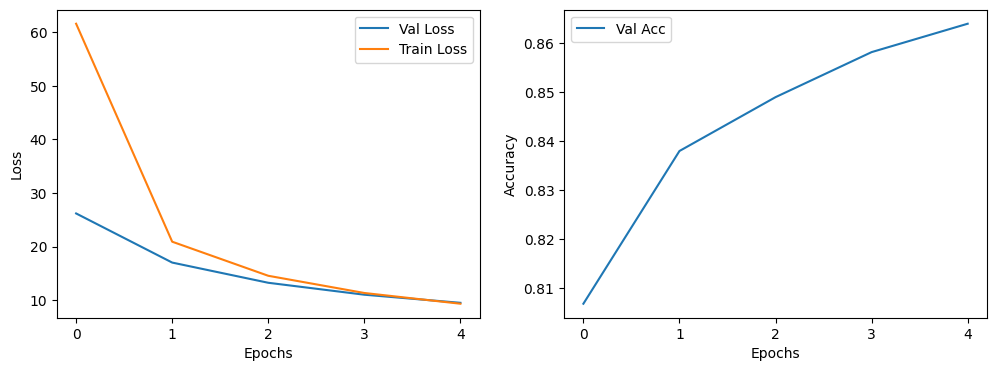

In [20]:
plot_results(history).show()